<a href="https://colab.research.google.com/github/SiLiKhon/RICH_GAN_misc/blob/master/RICH_Data_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RICH Data Overview

## Get the data

The training sample is shared [here](https://cernbox.cern.ch/index.php/s/RkZoMRBofrhqzZm).

These are simulated detector responses for 6 particle types (below are per-file links to the same files as above):



*   electrons https://cernbox.cern.ch/index.php/s/q5ZwDYfvOXJmnBR
*   kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q
*   muons https://cernbox.cern.ch/index.php/s/jfw0Nhyw8gYNBhk
*   pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
*   protons https://cernbox.cern.ch/index.php/s/SQ6G6dmLOLTvMuz
*   ghosts https://cernbox.cern.ch/index.php/s/9Ui4xKerEDdw7Fv (these are 'fake' tracks - i.e. random tracker hits that look like a track from a real particle)



In [1]:
# let's download pions and kaons
!wget -O pions https://cernbox.cern.ch/index.php/s/dyZJGMZuVRW0Kgg
!wget -O kaons https://cernbox.cern.ch/index.php/s/nfBRDGCagdgor3q

def convert_to_direct_link(fname):
  def get_direct_link(fname):
    with open(fname) as f:
      lines = f.readlines()
      for l in lines:
        print('-_______-', l)
        if 'downloadURL' in l:
          parts = l.split()
          for p in parts:
            if p[:5] == 'value':
              return p.split('"')[-2]
      raise KeyError("downloadURL not found")
  
  link = get_direct_link(fname)
  with open(fname, 'w') as f:
    f.write(link)

convert_to_direct_link('kaons')
convert_to_direct_link('pions')
!wget -O v1_pion_train.csv `cat pions`
!wget -O v1_kaon_train.csv `cat kaons`

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_pion = pd.read_csv('E:/RICH_Data/v1_pion_train.csv')
df_kaon = pd.read_csv('E:/RICH_Data/v1_kaon_train.csv')
df_muon = pd.read_csv('E:/RICH_Data/v1_muon_train.csv')
df_proton = pd.read_csv('E:/RICH_Data/v1_proton_train.csv')
df_electron = pd.read_csv('E:/RICH_Data/v1_electron_train.csv')
df_ghost = pd.read_csv('E:/RICH_Data/v1_ghost_train.csv')

In [5]:
print(df_pion.columns)
print(df_kaon.columns)
print(df_muon.columns)
print(df_proton.columns)
print(df_electron.columns)
print(df_ghost.columns)

Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object')
Index(['TrackPt', 'TrackP', 'NumLongTracks', 'MCParticleType', 'RichDLLbt',
       'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe', 'TrackEta'],
      dtype='object'

Input variables are:
*   `TrackP` – full momentum of the particle
*   `TrackPt` – length of the momentum projection to the XY plane
*   `TrackEta` – track [pseudorapidity](https://en.wikipedia.org/wiki/Pseudorapidity)
*   `NumLongTracks` – number of reconstructed tracks in current event

Please note that among P, Pt and ETA there are only **two** independant variables. 


The variables to predict are:

*   `RichDLLbt`
*   `RichDLLk`
*   `RichDLLmu`
*   `RichDLLp`
*   `RichDLLe`


There's also one additional variable:

*   `MCParticleType` – particle [PDG code](http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf)




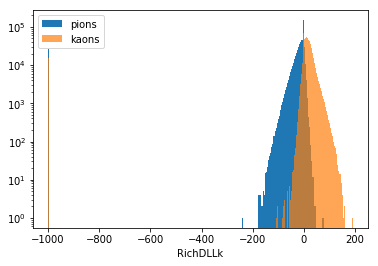

In [6]:
bins = np.linspace(
        start=min(df_pion.RichDLLk.min(), df_kaon.RichDLLk.min()), 
        stop =max(df_pion.RichDLLk.max(), df_kaon.RichDLLk.max()), 
        num=601
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

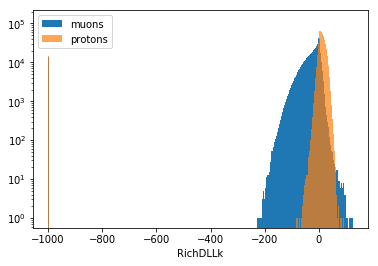

In [7]:
bins = np.linspace(
        start=min(df_muon.RichDLLk.min(), df_proton.RichDLLk.min()), 
        stop =max(df_muon.RichDLLk.max(), df_proton.RichDLLk.max()), 
        num=601
    )

plt.hist(df_muon.RichDLLk, bins=bins, label='muons')
plt.hist(df_proton.RichDLLk, bins=bins, label='protons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

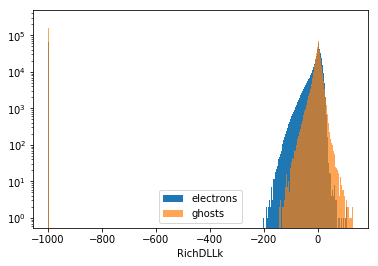

In [8]:
bins = np.linspace(
        start=min(df_electron.RichDLLk.max(), df_ghost.RichDLLk.min()), 
        stop =max(df_electron.RichDLLk.max(), df_ghost.RichDLLk.max()), 
        num=601
    )

plt.hist(df_electron.RichDLLk, bins=bins, label='electrons')
plt.hist(df_ghost.RichDLLk, bins=bins, label='ghosts', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

One can see there's a peak of outliers at the left handside of the plot. Let's not bother about it so far.

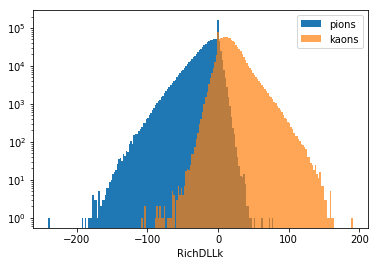

In [9]:
not_outlier_pion = df_pion.RichDLLk > -500
not_outlier_kaon = df_kaon.RichDLLk > -500

bins = np.linspace(
        start=min(df_pion.RichDLLk[not_outlier_pion].min(), df_kaon.RichDLLk[not_outlier_kaon].min()), 
        stop =max(df_pion.RichDLLk[not_outlier_pion].max(), df_kaon.RichDLLk[not_outlier_kaon].max()), 
        num=201
    )

plt.hist(df_pion.RichDLLk, bins=bins, label='pions')
plt.hist(df_kaon.RichDLLk, bins=bins, label='kaons', alpha=0.7)
plt.yscale('log')
plt.legend()
plt.xlabel('RichDLLk');

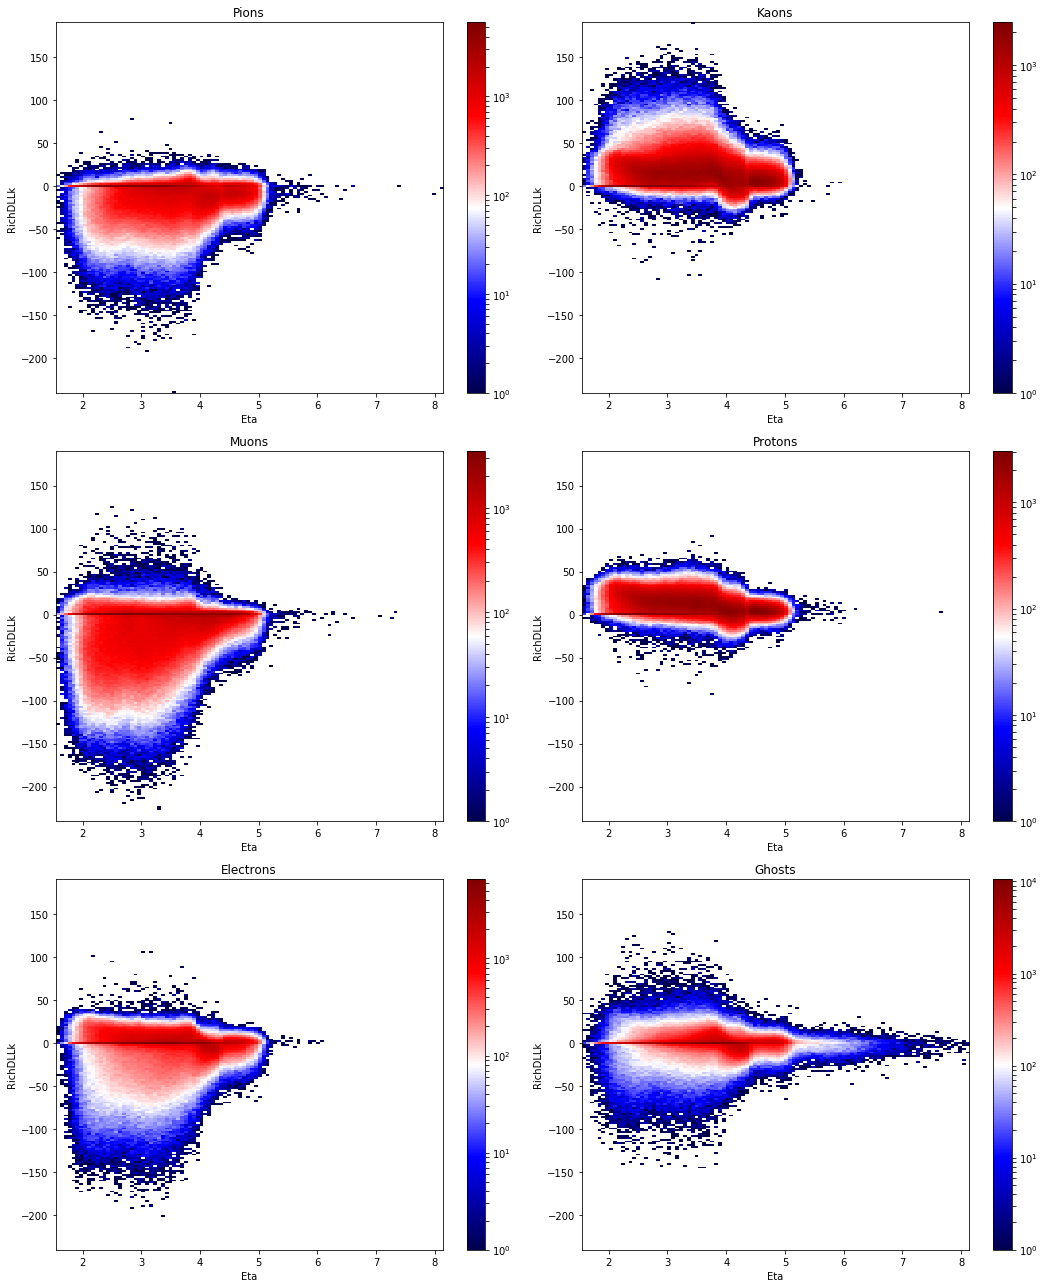

In [10]:
import matplotlib.colors as colors

fig, ((ax_pion, ax_kaon), (ax_muon, ax_proton), (ax_electron, ax_ghost)) = plt.subplots(
                                    nrows=3,
                                    ncols=2,
                                    figsize=(15, 18)
                                )

_, bins_x, bins_y, img_pion = \
    ax_pion.hist2d(
            x=df_pion.TrackEta,
            y=df_pion.RichDLLk,
            bins=(100, bins),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_kaon = \
    ax_kaon.hist2d(
            x=df_kaon.TrackEta,
            y=df_kaon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_muon = \
    ax_muon.hist2d(
            x=df_muon.TrackEta,
            y=df_muon.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_proton = \
    ax_proton.hist2d(
            x=df_proton.TrackEta,
            y=df_proton.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_electron = \
    ax_electron.hist2d(
            x=df_electron.TrackEta,
            y=df_electron.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )
_, _, _, img_ghost = \
    ax_ghost.hist2d(
            x=df_ghost.TrackEta,
            y=df_ghost.RichDLLk,
            bins=(bins_x, bins_y),
            cmap='seismic',
            norm=colors.LogNorm()
        )



plt.colorbar(img_pion, ax=ax_pion)
plt.colorbar(img_kaon, ax=ax_kaon)
plt.colorbar(img_muon, ax=ax_muon)
plt.colorbar(img_proton, ax=ax_proton)
plt.colorbar(img_electron, ax=ax_electron)
plt.colorbar(img_ghost, ax=ax_ghost)
ax_pion.set_xlabel('Eta')
ax_kaon.set_xlabel('Eta')
ax_muon.set_xlabel('Eta')
ax_proton.set_xlabel('Eta')
ax_electron.set_xlabel('Eta')
ax_ghost.set_xlabel('Eta')
ax_pion.set_ylabel('RichDLLk')
ax_kaon.set_ylabel('RichDLLk')
ax_muon.set_ylabel('RichDLLk')
ax_proton.set_ylabel('RichDLLk')
ax_electron.set_ylabel('RichDLLk')
ax_ghost.set_ylabel('RichDLLk')
ax_pion.set_title('Pions')
ax_kaon.set_title('Kaons')
ax_muon.set_title('Muons')
ax_proton.set_title('Protons')
ax_electron.set_title('Electrons')
ax_ghost.set_title('Ghosts')
fig.tight_layout();

# The simplest model possible

In [75]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

class Model:
    def train(self, X, Y):
        self.n = 8
        y_n = KMeans(n_clusters=self.n).fit_predict(X)
        self.means = [{}, {}, {}, {}, {}, {}, {}, {}]
        self.stds = [{}, {}, {}, {}, {}, {}, {}, {}]
        for col in Y.columns:
            for i in range(self.n):
                self.means[i][col] = np.mean(Y.loc[y_n == i, [col]])
                self.stds[i][col] = np.std(Y.loc[y_n == i, [col]])
        self.model = LogisticRegression()
        self.model.fit(X, y_n)

    def predict(self, X):
        y = self.model.predict(X)
        prediction = pd.DataFrame()
        for col in self.means[0].keys():
            arr = np.zeros(len(X))
            for i in range(self.n):
                cur = np.random.normal(loc=self.means[i][col],
                                scale=self.stds[i][col],
                                size=np.sum(y == i))
                arr[y == i] = cur
            prediction[col] = arr
        return prediction

In [76]:
from sklearn.model_selection import KFold
from scipy.stats import ks_2samp

In [77]:
x_cols = ['TrackP', 'TrackEta', 'NumLongTracks']
y_cols = ['RichDLLbt', 'RichDLLk', 'RichDLLmu', 'RichDLLp', 'RichDLLe']


def score_func(sample1, sample2, n_slices=100):
    score = 0
    cols = x_cols + y_cols
    w_normal = np.random.normal(size=(n_slices, len(cols)))
    sample1 = sample1.copy()[cols].values
    sample2 = sample2.copy()[cols].values
    for k in range(n_slices):
        score = max(score,
                    ks_2samp(
                        np.sum(w_normal[k] * sample1, axis=1), 
                        np.sum(w_normal[k] * sample2, axis=1)
                    )[0]
                   )
    return score

In [78]:
kf = KFold(n_splits=5)
train_index, test_index = next(kf.split(df_pion[x_cols]))

X_train = df_pion[x_cols].iloc[train_index]
Y_train = df_pion[y_cols].iloc[train_index]
X_test  = df_pion[x_cols].iloc[test_index ]
Y_test  = df_pion[y_cols].iloc[test_index ]

model = Model()
model.train(X_train[not_outlier_pion[train_index]], Y_train[not_outlier_pion[train_index]])
Y_pred = model.predict(X_test)

print('Model score :', score_func(pd.concat([X_test, Y_test], axis=1),
                                   pd.concat([X_test, Y_pred], axis=1)))
print('Best score :', score_func(pd.concat([X_test, Y_test], axis=1),
                                  pd.concat([X_train, Y_train], axis=1)))

Model score : 0.05613443865561345
Best score : 0.0034081833145798712


In [79]:
kf = KFold(n_splits=5)

model_scores = []
best_scores  = []

for train_index, test_index in kf.split(df_pion[x_cols]):
  X_train = df_pion[x_cols].iloc[train_index]
  Y_train = df_pion[y_cols].iloc[train_index]
  X_test  = df_pion[x_cols].iloc[test_index]
  Y_test  = df_pion[y_cols].iloc[test_index]
  
  model = Model()
  model.train(X_train[not_outlier_pion[train_index]], Y_train[not_outlier_pion[train_index]])
  Y_pred = model.predict(X_test)
  
  model_scores.append(score_func(pd.concat([X_test, Y_test], axis=1), pd.concat([X_test, Y_pred], axis=1) ))
  best_scores.append(score_func(pd.concat([X_test, Y_test], axis=1),  pd.concat([X_train, Y_train], axis=1)))

In [80]:
def dftrain(df):
    kf = KFold(n_splits=5)

    model_scores = []
    best_scores  = []
    not_outlier = df.RichDLLk > -500
    for train_index, test_index in kf.split(df[x_cols]):
        X_train = df[x_cols].iloc[train_index]
        Y_train = df[y_cols].iloc[train_index]
        X_test  = df[x_cols].iloc[test_index]
        Y_test  = df[y_cols].iloc[test_index]

        model = Model()
        model.train(X_train[not_outlier[train_index]], Y_train[not_outlier[train_index]])
        Y_pred = model.predict(X_test)

        # model_scores.append(score_func(Y_test, Y_pred ))
        # best_scores .append(score_func(Y_test, Y_train))
        model_scores.append(score_func(pd.concat([X_test, Y_test], axis=1), pd.concat([X_test, Y_pred], axis=1) ))
        best_scores .append(score_func(pd.concat([X_test, Y_test], axis=1),  pd.concat([X_train, Y_train], axis=1)))
    return Y_test, Y_pred, model_scores, best_scores

In [81]:
def dfshow(Y_test, Y_pred, model_scores, best_scores):
    bins = np.linspace(
                start=min(model_scores + best_scores), 
                stop =max(model_scores + best_scores), 
                num=201
            )

    plt.hist(model_scores, bins=bins, label='model')
    plt.hist(best_scores , bins=bins, label='best possible', alpha=0.6)
    plt.legend()
    plt.xlabel('KS Scores');
    
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(6, 25))
    i = 0
    for col in Y_pred.columns:
        _, bins, _ = axes[i].hist(Y_test[col], bins=100 , label='test'      )
        _, _   , _ = axes[i].hist(Y_pred[col], bins=bins, label='prediction', alpha=0.7)
        axes[i].legend()
        axes[i].set_xlabel(col)
        i += 1
    fig.show();

In [82]:
def fit_show(df):
    Y_test, Y_pred, model_scores, best_scores = dftrain(df)
    dfshow(Y_test, Y_pred, model_scores, best_scores)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


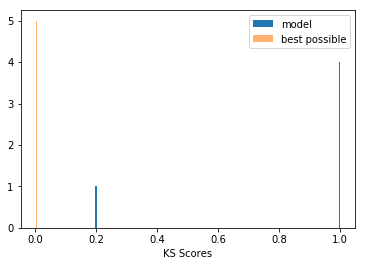

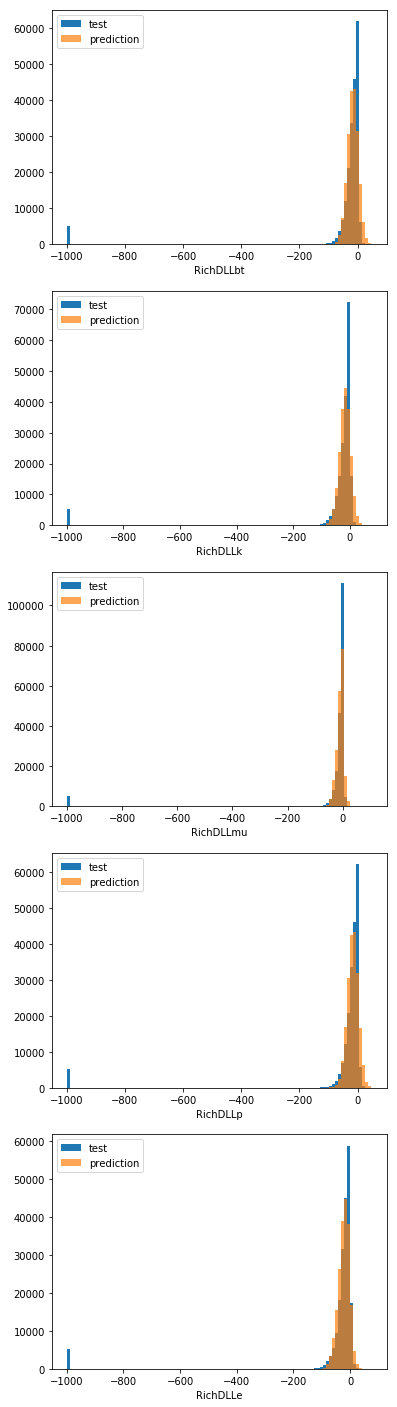

In [83]:
fit_show(df_pion)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


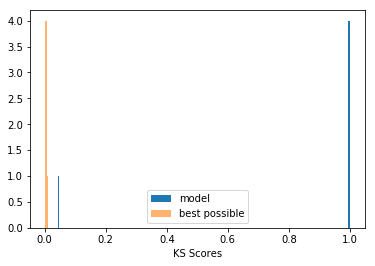

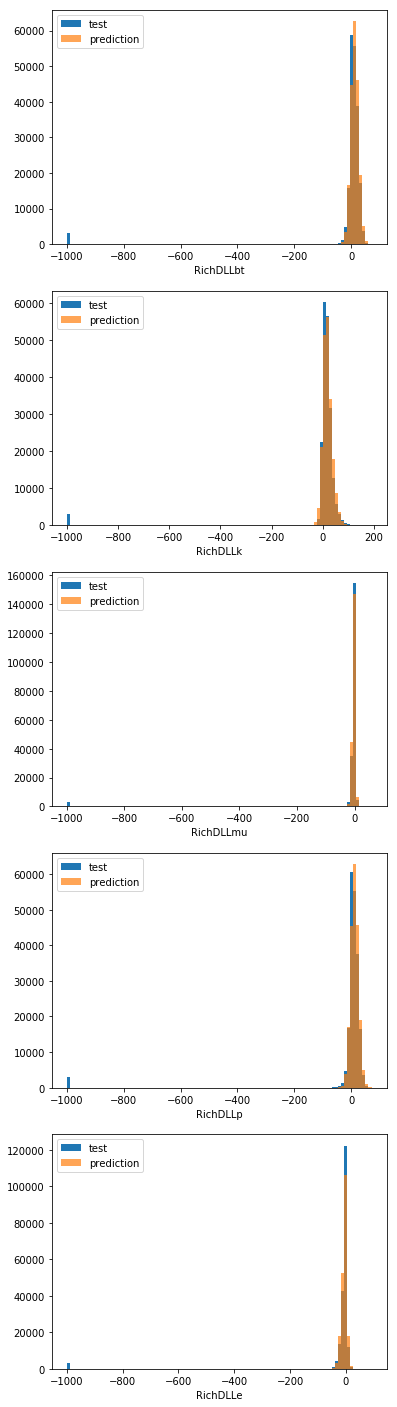

In [84]:
fit_show(df_kaon)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


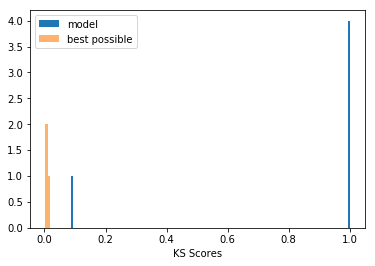

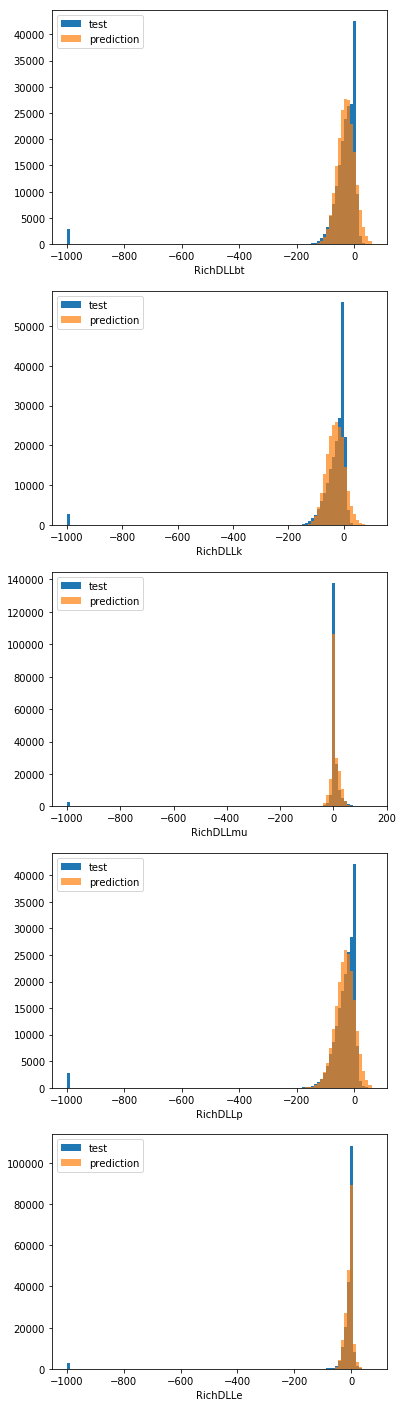

In [85]:
fit_show(df_muon)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


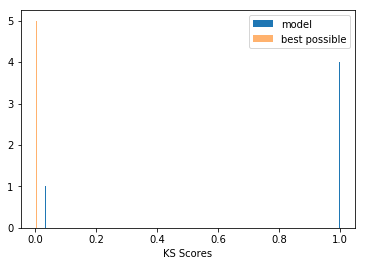

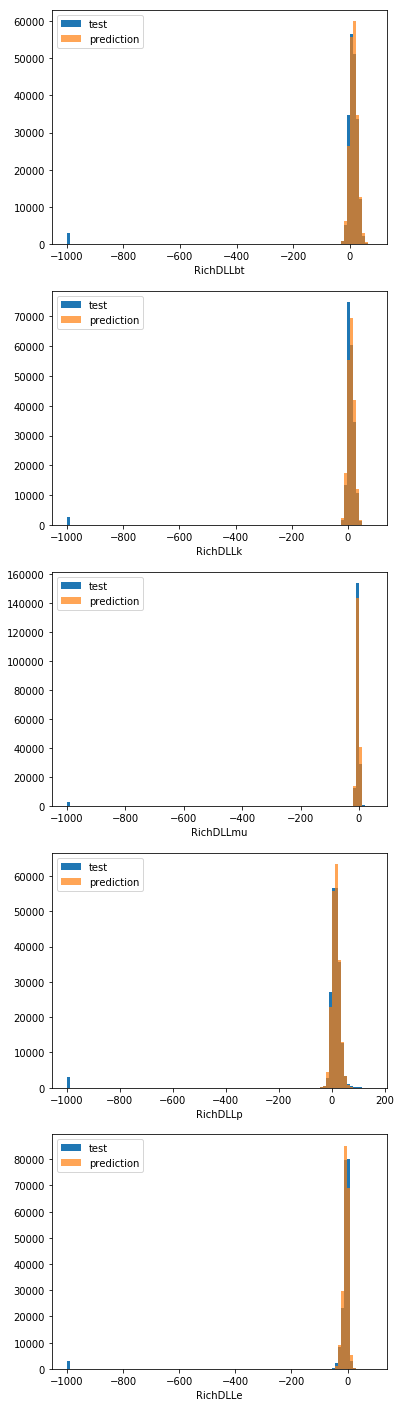

In [86]:
fit_show(df_proton)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


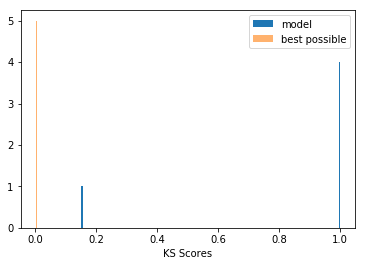

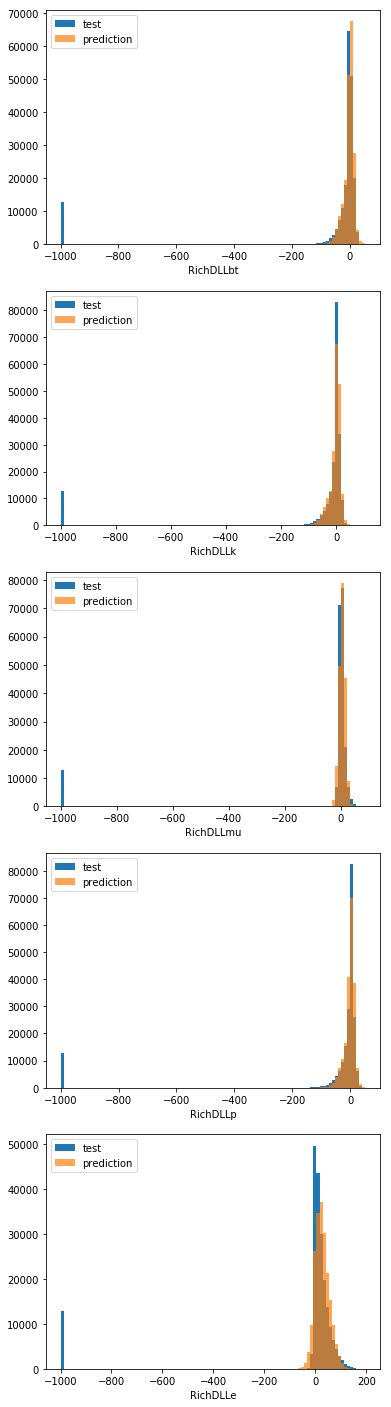

In [87]:
fit_show(df_electron)

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


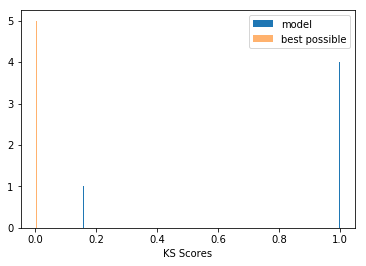

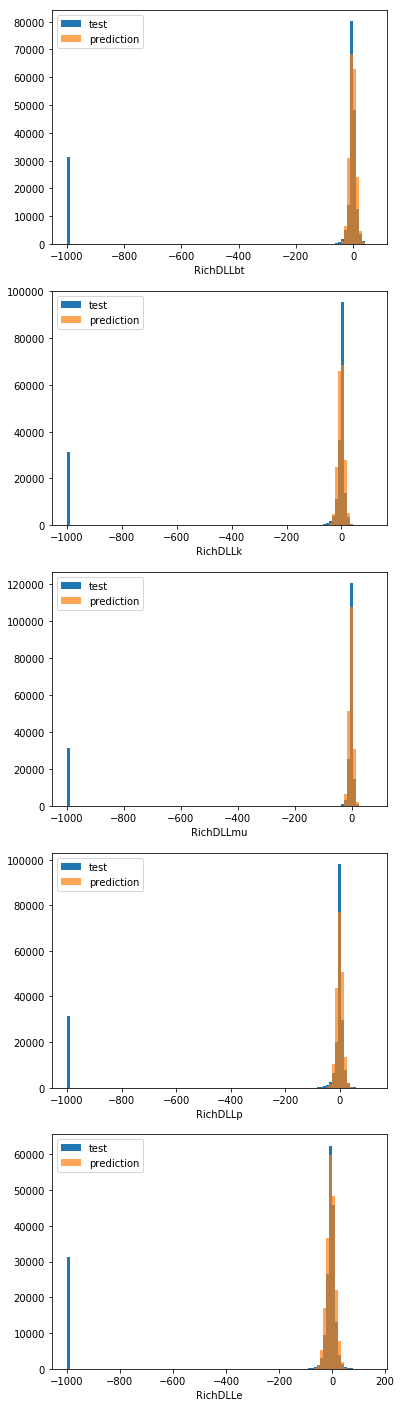

In [88]:
fit_show(df_ghost)